<a href="https://colab.research.google.com/github/kjahan/semantic_similarity/blob/features%2Ftest_harness/examples/colab/semantic_similarity_with_sbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install necessary packages**

[Semantic Textual Similarity](https://www.sbert.net/docs/usage/semantic_textual_similarity.html)


In [1]:
!pip install -U sentence-transformers
!pip3 install seaborn

     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 2.6 MB 7.9 MB/s 
     |████████████████████████████████| 1.2 MB 38.2 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 3.3 MB 49.3 MB/s 
     |████████████████████████████████| 895 kB 58.2 MB/s 
     |████████████████████████████████| 636 kB 44.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=c0826af4a75549ec3cc8b3c1ce2f1b0cd39dfd875223dabe019fea58d5ef0a84
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from sentence_transformers import SentenceTransformer, util

import numpy as np
import seaborn as sns
import pandas as pd

import random
import re
import itertools

In [3]:
# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']


**Semantic similarity**

In [4]:
model = SentenceTransformer('paraphrase-MiniLM-L12-v2')

In [5]:
# Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

# Compute cosine-similarits
cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)

# Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

The cat sits outside 		 The dog plays in the garden 		 Score: 0.1927
A man is playing guitar 		 A woman watches TV 		 Score: 0.0188
The new movie is awesome 		 The new movie is so great 		 Score: 0.9292


# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [6]:
def plot_similarity(labels, features, rotation):
  # Compute cosine-similarits
  corr = util.pytorch_cos_sim(features, features)

  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  # message_embeddings_ = embed(messages_)
  message_embeddings_ = model.encode(messages_, convert_to_tensor=True)
  plot_similarity(messages_, message_embeddings_, 90)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

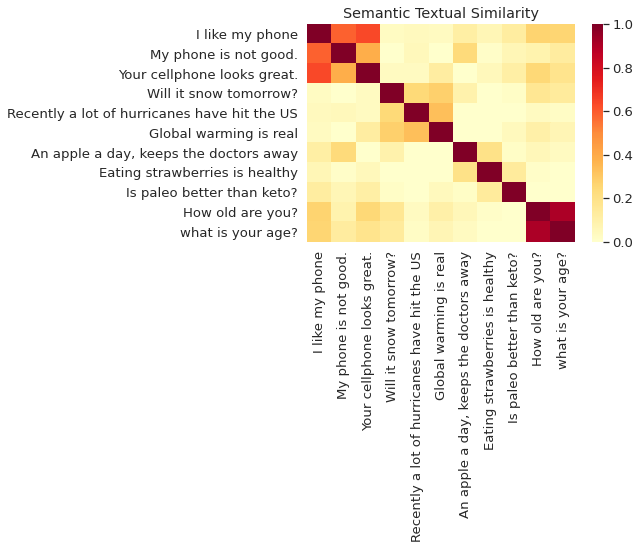

In [7]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

## Load quora questions

First, create a folder named "dataset" in content folder in the colab.  Then upload the train.csv from dataset folder from the same repo into content/dataset folder in Colab!

In [11]:
quora_questions = pd.read_csv('dataset/train.csv', error_bad_lines=True)
quora_questions.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
q1_lst = quora_questions['question1'].tolist()
q2_lst = quora_questions['question2'].tolist()

In [13]:
n = 100
sampled_q1 = q1_lst[:n]
sampled_q2 = q2_lst[:n]

# Compute embedding for both lists
q1_embs = model.encode(sampled_q1, convert_to_tensor=True)
q2_embs = model.encode(sampled_q2, convert_to_tensor=True)

# Compute cosine-similarits
q_cosine_scores = util.pytorch_cos_sim(q1_embs, q2_embs)

# Output the pairs with their score
semantic_sim_thresh = 0.9
for i in range(len(sampled_q1)):
  semantic_sim =  q_cosine_scores[i][i]
  if semantic_sim >= semantic_sim_thresh: 
    print("{} \t\t {} \t\t Score: {:.4f}".format(sampled_q1[i], sampled_q2[i], q_cosine_scores[i][i]))

What is the step by step guide to invest in share market in india? 		 What is the step by step guide to invest in share market? 		 Score: 0.9066
How can I be a good geologist? 		 What should I do to be a great geologist? 		 Score: 0.9040
How do I read and find my YouTube comments? 		 How can I see all my Youtube comments? 		 Score: 0.9106
What can make Physics easy to learn? 		 How can you make physics easy to learn? 		 Score: 0.9753
What was your first sexual experience like? 		 What was your first sexual experience? 		 Score: 0.9883
What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada? 		 What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan? 		 Score: 0.9181
What does manipulation mean? 		 What does manipulation means? 		 Score: 0.9981
What Game of Thrones villain would be the most likely to give you mercy? 		 W

## Sample random list of questions and find similar ones



In [14]:
semantic_sim_thresh = 0.5

cnt = 0
while cnt < 10:
  n = 100
  sampled_qs_1 = random.sample(q1_lst, n)
  sampled_qs_2 = random.sample(q2_lst, n)

  # Compute embedding for both lists
  q1_embs = model.encode(sampled_qs_1, convert_to_tensor=True)
  q2_embs = model.encode(sampled_qs_2, convert_to_tensor=True)

  # Compute cosine-similarits
  q_cosine_scores = util.pytorch_cos_sim(q1_embs, q2_embs)

  # Output the pairs with their score
  for i in range(len(sampled_qs_1)):
    semantic_sim =  q_cosine_scores[i][i]
    # print(semantic_sim)
    if semantic_sim > semantic_sim_thresh: 
      print("{} \t\t {} \t\t Score: {:.4f}".format(sampled_qs_1[i], sampled_qs_2[i], semantic_sim))
  
  cnt += 1


## Given a query find semantically similary questions

This is bruteforce we should use more effcient NN search algos like Faiss

In [15]:
n = 1000
semantic_sim_thresh = 0.5
query = random.sample(q1_lst, 1)[0]
print("Query: {}".format(query))
query_q = [query]*n
query_embs = model.encode(query_q, convert_to_tensor=True)

cnt = 0
while cnt < 10:
  sampled_qs_2 = random.sample(q2_lst, n)

  # Compute embedding for question lists
  q_embs = model.encode(sampled_qs_2, convert_to_tensor=True)

  # Compute cosine-similarits
  q_cosine_scores = util.pytorch_cos_sim(query_embs, q_embs)

  # Output the pairs with their score
  for i in range(len(sampled_qs_2)):
    semantic_sim =  q_cosine_scores[i][i]
    # print(semantic_sim)
    if semantic_sim > semantic_sim_thresh: 
      print("{} \t\t {} \t\t Score: {:.4f}".format(query_q[i], sampled_qs_2[i], semantic_sim))
    
  cnt += 1


Query: Do Indians realize that Territorial map of India looks like this?
Do Indians realize that Territorial map of India looks like this? 		 How and when did the name "India" come into use? 		 Score: 0.5022
Do Indians realize that Territorial map of India looks like this? 		 Is India still a secular state? 		 Score: 0.5082
Do Indians realize that Territorial map of India looks like this? 		 What makes India a very different country from rest of the world? 		 Score: 0.5438


## Load cooking stackexchange data

Load the cooking.stackexchange.txt into dataset folder.

In [ ]:
stackex_fn = '../content/dataset/cooking.stackexchange.txt'

stackex_questions = []
with open(stackex_fn) as f:
  stackex_questions = [re.split(r"__label__\S+\s{1}", line.strip())[-1] for line in f]        # create a list of questions

## Find SS questions from Stack Exchange dataset

This is for basic demo purpose we have to use effiecient algos like Faiss for search!

In [ ]:
n = 100
semantic_sim_thresh = 0.7
cnt = 0

while cnt < 10:
  sampled_qs_1 = random.sample(stackex_questions, n)
  sampled_qs_2 = random.sample(stackex_questions, n)

  # Compute embedding for both lists
  q1_embs = model.encode(sampled_qs_1, convert_to_tensor=True)
  q2_embs = model.encode(sampled_qs_2, convert_to_tensor=True)

  # Compute cosine-similarits
  q_cosine_scores = util.pytorch_cos_sim(q1_embs, q2_embs)

  # Output the pairs with their score
  for i in range(len(sampled_qs_1)):
    semantic_sim =  q_cosine_scores[i][i]
    if semantic_sim > semantic_sim_thresh: 
      print("{} \t\t {} \t\t Score: {:.4f}".format(sampled_qs_1[i], sampled_qs_2[i], semantic_sim))
  
  cnt += 1

How to make fried chicken tender and juicy? 		 Confirming Fried Chicken is completely cooked 		 Score: 0.7034


## Test questions matching

In [18]:
# 0.94568664
q11, q12 = ['What are Carbon Credits?', 'What is the definition of carbon footprint?What is carbon credits all about?']

# 0.94886285
q21, q22 = ['What are Carbon Credits?', 'What is a carbon credit ?']

# 0.955179
q31, q32 = ['What are Carbon Credits?', '21 ( What are carbon credits ?']

# 0.9542288
q41, q42 = ['What is the first hormone produced in the body of the fetus and when does it begin to be secreted', 'In mammals , at what stage of development does the embryo implant into the uterus ? Morula Zygote Gastrula']

#0.9182783 
q51, q52 = ["Kelly\'s organization corollary assumes which type of relationship among constructs?", "In Fiedler \'s Contingency Theory , the \" contingency variable \" is the leader \'s orientation toward relationships versus tasks . 123 ) ___ __"]

# 0.9176446
q61, q62 = ["Kelly\'s organization corollary assumes which type of relationship among constructs?",  "Analytic Hierarchy Process Define Hierarchy model :"]

# 0.9297825	83463602	document_questions_v3
q71, q72 = ["Question text Which of the following does not return numeric value?", "2 / 2 pts Which of the following code statements sets the text of an element ? Correct ! text ( value ) val ( ) val ( value )"]

# 0.92185783
q81, q82 = ["Please find at least one article that has to do with anxiety to support your therapeutic approach.",	"article on the topic of anxiety. More specifically, conduct some online research and find a piece of news/information related to any of the anxiety disorders discussed in your textbook/class. The news piece can be a case about the disorder and its symptoms, the disorder and treatment options (including traditional medicine or holistic medicine), and/or both symptoms and treatment.REMINDER: Check the source for credibility. Once you found the information, provide a summary, your opinion, and link"]

# 0.9551236
q91, q92 = ["19) On January 1, 2020, Guiguinto Company received a 3-year, P10,000,000 loan, with interest payments occurring at the end of",	"Sielert Corporation borrowed $ 900,000 from National Bank on May 31 , 2013 . The three - year , 7 % note required annual payments of $ 342,945 beginning May 31 , 2014 . The total amount of interest to be paid over the life of the loan is"]

# Two lists of paired questions
qs_1 = [q11, q21, q31, q41, q51, q61, q71, q81, q91]

qs_2 = [q12, q22, q32, q42, q52, q62, q72, q82, q92]


# Compute embedding for both lists
embs_1 = model.encode(qs_1, convert_to_tensor=True)
embs_2 = model.encode(qs_2, convert_to_tensor=True)

# Compute cosine-similarits
cosine_scores = util.pytorch_cos_sim(embs_1, embs_2)

# Output the pairs with their score
for i in range(len(qs_1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(qs_1[i], qs_2[i], cosine_scores[i][i]))

What are Carbon Credits? 		 What is the definition of carbon footprint?What is carbon credits all about? 		 Score: 0.8295
What are Carbon Credits? 		 What is a carbon credit ? 		 Score: 0.9042
What are Carbon Credits? 		 21 ( What are carbon credits ? 		 Score: 0.9234
What is the first hormone produced in the body of the fetus and when does it begin to be secreted 		 In mammals , at what stage of development does the embryo implant into the uterus ? Morula Zygote Gastrula 		 Score: 0.5141
Kelly's organization corollary assumes which type of relationship among constructs? 		 In Fiedler 's Contingency Theory , the " contingency variable " is the leader 's orientation toward relationships versus tasks . 123 ) ___ __ 		 Score: 0.4565
Kelly's organization corollary assumes which type of relationship among constructs? 		 Analytic Hierarchy Process Define Hierarchy model : 		 Score: 0.3932
Question text Which of the following does not return numeric value? 		 2 / 2 pts Which of the following 